In [1]:
import psycopg2
import pandas as pd
import pandas.io.sql as pd_sql
import numpy as np
import matplotlib.pyplot as plt
#from sqlalchemy import create_engine

In [2]:
def connectDB(DB):
    # connect to the PostgreSQL server
    return psycopg2.connect(
        database=DB,
        user="postgres",
        password="Georgetown16",
        host="database-1.c5vispb5ezxg.us-east-1.rds.amazonaws.com",
        port='5432')

def disconnectDB():
    cur.close()
    conn.close()


In [3]:
# connect to "Dataset" DB 
conn = connectDB("Dataset")

# extract everything from 'table_name' into a dataframe
df = pd_sql.read_sql(f"select * from public.\"featureSTG\" ", con=conn)
pd.set_option('display.max_column',50)
df.head()

,level_0,index,id_student,code_module,module_domain,module_presentation_length,term,year,num_of_prev_attempts,final_result,date_registration,disability,gender,age_band,region,highest_education,imd_band,studied_credits,b4_sum_clicks,qtr_sum_clicks,half_sum_clicks,threeqtr_sum_clicks,qtr_half_sum_clicks,half_threeqtr_sum_clicks,thrd_sum_clicks,twothrd_sum_clicks,thrd_twothrd_sum_clicks,allclicks,std_half_score,std_total_weight
0,0,0,3733,3.0,1,261,0,0,0,0,-68.0,0,0,2,3,3,9.0,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,6516,0.0,0,269,0,1,0,1,-52.0,0,0,2,0,3,8.0,60,256.0,862.0,1347.0,2066.0,513.0,719.0,1040.0,1875.0,307.0,2791.0,28.2,100.0
2,2,2,8462,3.0,1,261,0,0,0,0,-137.0,0,0,2,2,3,3.0,90,81.0,446.0,565.0,565.0,119.0,0.0,525.0,565.0,40.0,646.0,34.9,40.0
3,3,3,8462,3.0,1,262,0,1,1,0,-38.0,0,0,2,2,3,3.0,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,11391,0.0,0,268,0,0,0,1,-159.0,0,0,2,1,3,9.0,240,98.0,447.0,612.0,650.0,165.0,38.0,489.0,615.0,123.0,934.0,40.8,100.0


In [4]:
df.dtypes

level_0                         int64
index                           int64
id_student                      int64
code_module                   float64
module_domain                   int64
module_presentation_length      int64
term                            int64
year                            int64
num_of_prev_attempts            int64
final_result                    int64
date_registration             float64
disability                      int64
gender                          int64
age_band                        int64
region                          int64
highest_education               int64
imd_band                      float64
studied_credits                 int64
b4_sum_clicks                 float64
qtr_sum_clicks                float64
half_sum_clicks               float64
threeqtr_sum_clicks           float64
qtr_half_sum_clicks           float64
half_threeqtr_sum_clicks      float64
thrd_sum_clicks               float64
twothrd_sum_clicks            float64
thrd_twothrd


df['imd_band']=df['imd_band'].map({'0-10%':0,'10-20':1,'20-30%':2,'30-40%':3,'40-50%':4,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9})
df['module_domain'] = df['module_domain'].map({'SocialScience': 0,'STEM': 1})
df['term'] = df['term'].map({'J': 0,'B': 1})
df['year'] = df['year'].map({'2013': 0,'2014': 1})
df['is_reenrolled'] = df['is_reenrolled'].replace(range(1,12), 1)
df['gender'] = df['gender'].map({'M': 0,'F': 1})
df['age_band'] = df['age_band'].map({'0-35': 0,'35-55': 1,'55<=':2})
df['region'] = df['region'].map({'Scotland': 0,'East Anglian Region': 1,'London Region':2,'South Region': 3,'North Western Region': 4,'West Midlands Region':5,'South West Region': 6,'East Midlands Region': 7,'South East Region':8,'Wales': 9,'Yorkshire Region': 10,'North Region':11,'Ireland':12})
df['pass_fail_ind'] = df['pass_fail_ind'].map({'FAIL':0,'PASS':1})
df['disability'] = df['disability'].map({'N':0,'Y':1})
df['highest_education'] = df['highest_education'].map({'No Formal quals':0,'Lower Than A Level':1,'A Level or Equivalent':2,'HE Qualification':3,'Post Graduate Qualification':4})

In [5]:
df['term'].count()

32593

In [6]:
df['year'].isnull().sum()

0

In [7]:
df.groupby(['year','term'])['module_domain'].count()

year  term
0     0        8845
      1        4684
1     0       11260
      1        7804
Name: module_domain, dtype: int64

In [8]:
df.groupby(['year','term']).count()

level_0  index  id_student  code_module  module_domain  \
year term                                                           
0    0        8845   8845        8845         6562           8845   
     1        4684   4684        4684         3070           4684   
1    0       11260  11260       11260         8895          11260   
     1        7804   7804        7804         6304           7804   

           module_presentation_length  num_of_prev_attempts  final_result  \
year term                                                                   
0    0                           8845                  8845          8845   
     1                           4684                  4684          4684   
1    0                          11260                 11260         11260   
     1                           7804                  7804          7804   

           date_registration  disability  gender  age_band  region  \
year term                                                            
0    0                  8835        8845    8845      8845    8845   
     1                  4676        4684    4684      4684    4684   
1    0                 11251       11260   11260     11260   11260   
     1                  7786        7804    7804      7804    7804   

           highest_education  imd_band  studied_credits  b4_sum_clicks  \
year term                                                                
0    0                  8845      8578             8845           7012   
     1                  4684      4507             4684           3789   
1    0                 11260     10865            11260           8822   
     1                  7804      7532             7804           5941   

           qtr_sum_clicks  half_sum_clicks  threeqtr_sum_clicks  \
year term                                                         
0    0               7012             7012                 7012   
     1               3789             3789                 3789   
1    0               8822             8822                 8822   
     1               5941             5941                 5941   

           qtr_half_sum_clicks  half_threeqtr_sum_clicks  thrd_sum_clicks  \
year term                                                                   
0    0                    7012                      7012             7012   
     1                    3789                      3789             3789   
1    0                    8822                      8822             8822   
     1                    5941                      5941             5941   

           twothrd_sum_clicks  thrd_twothrd_sum_clicks  allclicks  \
year term                                                           
0    0                   7012                     7012       7012   
     1                   3789                     3789       3789   
1    0                   8822                     8822       8822   
     1                   5941                     5941       5941   

           std_half_score  std_total_weight  
year term                                    
0    0               7006              7012  
     1               3781              3789  
1    0               8816              8822  
     1               5938              5941

### Chek observations for Year 2013 Term J and Term B STEM class

In [9]:
df.groupby(['year','term','module_domain']).count()

level_0  index  id_student  code_module  \
year term module_domain                                            
0    0    0                 3572   3572        3572         3572   
          1                 5273   5273        5273         2990   
     1    0                 1767   1767        1767         1767   
          1                 2917   2917        2917         1303   
1    0    0                 3406   3406        3406         3406   
          1                 7854   7854        7854         5489   
     1    0                 2446   2446        2446         2446   
          1                 5358   5358        5358         3858   

                         module_presentation_length  num_of_prev_attempts  \
year term module_domain                                                     
0    0    0                                    3572                  3572   
          1                                    5273                  5273   
     1    0                                    1767                  1767   
          1                                    2917                  2917   
1    0    0                                    3406                  3406   
          1                                    7854                  7854   
     1    0                                    2446                  2446   
          1                                    5358                  5358   

                         final_result  date_registration  disability  gender  \
year term module_domain                                                        
0    0    0                      3572               3570        3572    3572   
          1                      5273               5265        5273    5273   
     1    0                      1767               1766        1767    1767   
          1                      2917               2910        2917    2917   
1    0    0                      3406               3405        3406    3406   
          1                      7854               7846        7854    7854   
     1    0                      2446               2441        2446    2446   
          1                      5358               5345        5358    5358   

                         age_band  region  highest_education  imd_band  \
year term module_domain                                                  
0    0    0                  3572    3572               3572      3538   
          1                  5273    5273               5273      5040   
     1    0                  1767    1767               1767      1746   
          1                  2917    2917               2917      2761   
1    0    0                  3406    3406               3406      3384   
          1                  7854    7854               7854      7481   
     1    0                  2446    2446               2446      2430   
          1                  5358    5358               5358      5102   

                         studied_credits  b4_sum_clicks  qtr_sum_clicks  \
year term module_domain                                                   
0    0    0                         3572           2859            2859   
          1                         5273           4153            4153   
     1    0                         1767           1364            1364   
          1                         2917           2425            2425   
1    0    0                         3406           2724            2724   
          1                         7854           6098            6098   
     1    0                         2446           1874            1874   
          1                         5358           4067            4067   

                         half_sum_clicks  threeqtr_sum_clicks  \
year term module_domain                                         
0    0    0                         2859                 2859   
          1                         4153                 4153   
     1    0         

### Create a temporaray data frame 

In [10]:
tempDf = df[['year','term','module_domain','region','gender','disability','allclicks','age_band','module_presentation_length','num_of_prev_attempts','final_result','highest_education','imd_band','studied_credits']]
# tempDf.head(20)

In [11]:
tempDf = tempDf.loc[(tempDf.year == 0)&(tempDf.module_domain==1)]
# Show first 20 observations of the dataset
tempDf.head(20)

,year,term,module_domain,region,gender,disability,allclicks,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits
0,0,0,1,3,0,0,NaN,2,261,0,0,3,9.0,60
2,0,0,1,2,0,0,646.0,2,261,0,0,3,3.0,90
10,0,1,1,1,1,0,NaN,0,240,0,0,2,4.0,90
24,0,0,1,8,0,0,478.0,1,268,2,0,3,8.0,60
29,0,0,1,9,0,0,NaN,1,268,0,0,1,0.0,30
32,0,0,1,6,0,0,410.0,0,261,0,0,1,6.0,60
40,0,0,1,1,1,1,813.0,0,261,0,0,1,3.0,60
41,0,0,1,10,1,0,661.0,1,261,0,0,3,1.0,70
52,0,0,1,5,0,0,8840.0,0,268,0,1,1,4.0,60
54,0,0,1,7,0,0,841.0,0,261,0,1,2,8.0,60


In [12]:
tempDf.count()

year                          8190
term                          8190
module_domain                 8190
region                        8190
gender                        8190
disability                    8190
allclicks                     6578
age_band                      8190
module_presentation_length    8190
num_of_prev_attempts          8190
final_result                  8190
highest_education             8190
imd_band                      7801
studied_credits               8190
dtype: int64

In [13]:
tempDf.groupby(['term']).count()

,year,module_domain,region,gender,disability,allclicks,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits
term,,,,,,,,,,,,,
0,5273,5273,5273,5273,5273,4153,5273,5273,5273,5273,5273,5040,5273
1,2917,2917,2917,2917,2917,2425,2917,2917,2917,2917,2917,2761,2917


In [14]:
tempDf=tempDf.drop(columns=['year','term','module_domain'])

In [15]:
# Create a Heatmap
## import packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

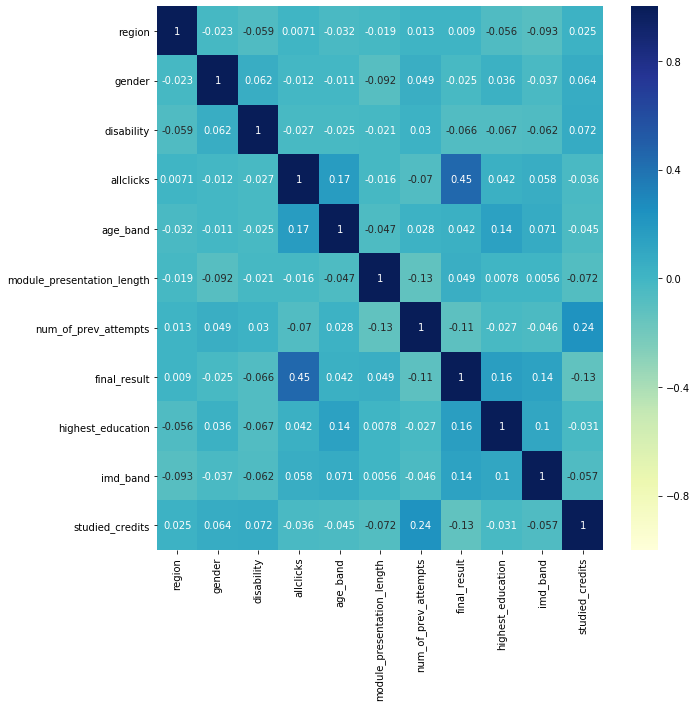

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(tempDf.corr(),vmin=-1,cmap='YlGnBu',annot=True)
plt.show()

## Logistic Regression

In [17]:
tempDf.head(20)

,region,gender,disability,allclicks,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits
0,3,0,0,NaN,2,261,0,0,3,9.0,60
2,2,0,0,646.0,2,261,0,0,3,3.0,90
10,1,1,0,NaN,0,240,0,0,2,4.0,90
24,8,0,0,478.0,1,268,2,0,3,8.0,60
29,9,0,0,NaN,1,268,0,0,1,0.0,30
32,6,0,0,410.0,0,261,0,0,1,6.0,60
40,1,1,1,813.0,0,261,0,0,1,3.0,60
41,10,1,0,661.0,1,261,0,0,3,1.0,70
52,5,0,0,8840.0,0,268,0,1,1,4.0,60
54,7,0,0,841.0,0,261,0,1,2,8.0,60


In [18]:
# drop missing values
tempDf=tempDf.dropna()
tempDf.head(20)

,region,gender,disability,allclicks,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits
2,2,0,0,646.0,2,261,0,0,3,3.0,90
24,8,0,0,478.0,1,268,2,0,3,8.0,60
32,6,0,0,410.0,0,261,0,0,1,6.0,60
40,1,1,1,813.0,0,261,0,0,1,3.0,60
41,10,1,0,661.0,1,261,0,0,3,1.0,70
52,5,0,0,8840.0,0,268,0,1,1,4.0,60
54,7,0,0,841.0,0,261,0,1,2,8.0,60
59,7,0,0,1608.0,0,268,1,0,2,4.0,60
68,8,0,0,137.0,1,261,2,0,2,0.0,60
73,4,0,0,858.0,1,261,1,0,2,4.0,60


In [19]:
tempDf.count()

region                        6226
gender                        6226
disability                    6226
allclicks                     6226
age_band                      6226
module_presentation_length    6226
num_of_prev_attempts          6226
final_result                  6226
highest_education             6226
imd_band                      6226
studied_credits               6226
dtype: int64

In [20]:
# Define our predictors
X=tempDf[['gender','disability','allclicks','age_band','num_of_prev_attempts','highest_education','studied_credits']]
y=tempDf['final_result']

In [21]:
# Implementing the model
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.520744
         Iterations 7
                           Results: Logit
Model:                 Logit             Pseudo R-squared:  0.237    
Dependent Variable:    final_result      AIC:               6498.3057
Date:                  2019-11-23 15:21  BIC:               6545.4612
No. Observations:      6226              Log-Likelihood:    -3242.2  
Df Model:              6                 LL-Null:           -4250.8  
Df Residuals:          6219              LLR p-value:       0.0000   
Converged:             1.0000            Scale:             1.0000   
No. Iterations:        7.0000                                        
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
gender               -0.1940   0.0689  -2.8165 0.0049 -0.3290 -0.0590
disability      

In [22]:
# Split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
# In this case, I set the test size to 0.25, and therefore the model testing will be based on 25% of the dataset, 
# while the model training will be based on 75% of the dataset

In [23]:
from sklearn.linear_model import LogisticRegression
# Initialize our algorithm
# lr = LogisticRegression(random_state=1, solver='liblinear')
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

/Users/yifei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


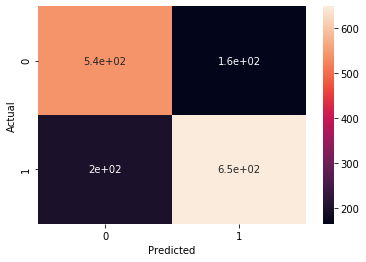

In [24]:
# Get a Confusion Matrix
from sklearn import metrics
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [25]:
# Print the Accuracy
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7655748233782916


In [26]:
# Print the Precision
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.7972972972972973


In [27]:
# Print the Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.7644287396937574


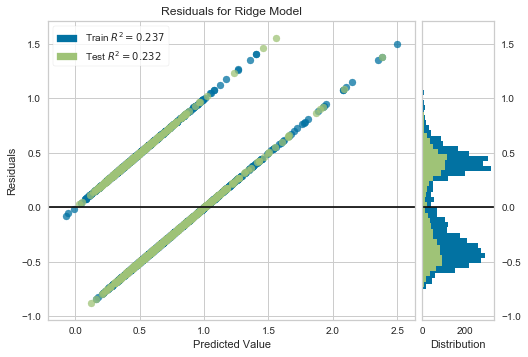

In [32]:
## Residuals Plot
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge
model = ResidualsPlot(Ridge())
model.fit(X_train, y_train)
model.score(X_test, y_test)
model.show()

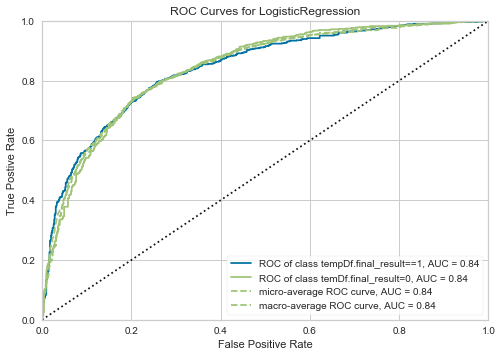

In [33]:
# ROCAUC 
from yellowbrick.classifier import ROCAUC
# Instantiate the visualizer with the classification model
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = ROCAUC(model, classes=["tempDf.final_result==1", "temDf.final_result=0"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

## Diving Deeper into the Results

In [118]:
print(X_test) # test dataset (without the actual outcome)

       gender  disability  allclicks  age_band  num_of_prev_attempts  \
7780        0           0      465.0         0                     0   
29225       1           0     6145.0         1                     0   
7307        0           1     3159.0         1                     0   
17181       0           0     3415.0         0                     0   
16265       0           0     4749.0         0                     0   
953         1           0      782.0         1                     1   
2707        0           0      701.0         0                     0   
5954        0           0     2264.0         1                     0   
7402        0           0     1736.0         1                     0   
15714       0           1     3633.0         1                     0   
10848       0           1     2013.0         0                     0   
2017        1           0     1140.0         0                     0   
10789       0           0     2334.0         0                  

In [119]:
print(y_pred)

[0 1 1 ... 1 0 1]


In [120]:
# Checking the prediction for a New Set of Data
# Let's use our model to predict Year 2014 STEM class results. 
# My goal is to use the existing logistic regression model to predict whether the new student will pass or fail.
# Create a new temporary data frame
tempDf2 = df[['year','term','module_domain','final_result','gender','disability','allclicks','age_band','num_of_prev_attempts','highest_education','studied_credits']]
tempDf2 = tempDf2.loc[(tempDf2.year == 1)&(tempDf2.module_domain==1)]
# Show first 20 observations of the dataset
tempDf2.head(20)

,year,term,module_domain,final_result,gender,disability,allclicks,age_band,num_of_prev_attempts,highest_education,studied_credits
3,1,0,1,0,0,0,NaN,2,1,3,60
7,1,0,1,1,1,0,910.0,0,0,2,120
11,1,1,1,1,1,0,1992.0,0,1,2,60
15,1,1,1,1,0,0,2103.0,0,0,3,60
16,1,0,1,0,1,0,997.0,0,0,3,60
17,1,0,1,0,1,0,113.0,0,2,3,150
23,1,1,1,1,1,0,15205.0,1,0,3,90
25,1,1,1,0,0,0,NaN,1,0,1,60
30,1,0,1,1,0,0,1847.0,0,0,3,120
31,1,1,1,0,1,0,2638.0,1,0,1,120


In [121]:
tempDf2.count()

year                    13212
term                    13212
module_domain           13212
final_result            13212
gender                  13212
disability              13212
allclicks               10165
age_band                13212
num_of_prev_attempts    13212
highest_education       13212
studied_credits         13212
dtype: int64

In [122]:
# Again, we drop those missing values
tempDf2=tempDf2.dropna()
tempDf2.head(20)

,year,term,module_domain,final_result,gender,disability,allclicks,age_band,num_of_prev_attempts,highest_education,studied_credits
7,1,0,1,1,1,0,910.0,0,0,2,120
11,1,1,1,1,1,0,1992.0,0,1,2,60
15,1,1,1,1,0,0,2103.0,0,0,3,60
16,1,0,1,0,1,0,997.0,0,0,3,60
17,1,0,1,0,1,0,113.0,0,2,3,150
23,1,1,1,1,1,0,15205.0,1,0,3,90
30,1,0,1,1,0,0,1847.0,0,0,3,120
31,1,1,1,0,1,0,2638.0,1,0,1,120
33,1,0,1,0,0,0,100.0,0,1,1,60
35,1,1,1,1,0,0,2129.0,0,0,3,60


In [123]:
tempDf2.count()

year                    10165
term                    10165
module_domain           10165
final_result            10165
gender                  10165
disability              10165
allclicks               10165
age_band                10165
num_of_prev_attempts    10165
highest_education       10165
studied_credits         10165
dtype: int64

In [124]:
df2 = pd.DataFrame(tempDf2,columns= ['gender', 'disability','allclicks','age_band','num_of_prev_attempts','highest_education','studied_credits'])

In [125]:
# Show the first 20 observations
df2.head(20)

,gender,disability,allclicks,age_band,num_of_prev_attempts,highest_education,studied_credits
7,1,0,910.0,0,0,2,120
11,1,0,1992.0,0,1,2,60
15,0,0,2103.0,0,0,3,60
16,1,0,997.0,0,0,3,60
17,1,0,113.0,0,2,3,150
23,1,0,15205.0,1,0,3,90
30,0,0,1847.0,0,0,3,120
31,1,0,2638.0,1,0,1,120
33,0,0,100.0,0,1,1,60
35,0,0,2129.0,0,0,3,60


In [126]:
# Define our predictors, this is the model we use in the previous dataset (tempDf)
X=tempDf[['gender','disability','allclicks','age_band','num_of_prev_attempts','highest_education','studied_credits']]
y=tempDf['final_result']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)

/Users/yifei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
# See how our model works
y_pred_new=logistic_regression.predict(df2)
y_test_new=tempDf2['final_result']

In [128]:
from sklearn.metrics import classification_report
print(classification_report(y_test_new,y_pred_new))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75      4408
           1       0.84      0.72      0.78      5757

    accuracy                           0.76     10165
   macro avg       0.77      0.77      0.76     10165
weighted avg       0.78      0.76      0.77     10165



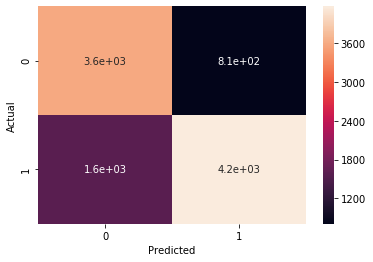

In [129]:
confusion_matrix = pd.crosstab(y_test_new, y_pred_new, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [130]:
# Print the Accuracy
print('Accuracy: ',metrics.accuracy_score(y_test_new, y_pred_new))

Accuracy:  0.7647811116576488
